In [ ]:
import pandas as pd
import os

In [ ]:
os.getcwd()

In [ ]:
movies = pd.read_csv('C:\\Users\\beefm\\Jupyter\\Homework Sections\\Movie-Ratings.csv')

In [ ]:
len(movies)

In [ ]:
movies.head()

In [ ]:
movies.columns

In [ ]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [ ]:
movies.head()

In [ ]:
movies.info()

In [ ]:
movies.describe()

In [ ]:
###Year needs to be a categorical value, not a numeric

In [ ]:
movies.Film = movies.Film.astype('category')

In [ ]:
movies.head()

In [ ]:
movies.info()

In [ ]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [26]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 19.8 KB


In [27]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [28]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [30]:
#Jointplots

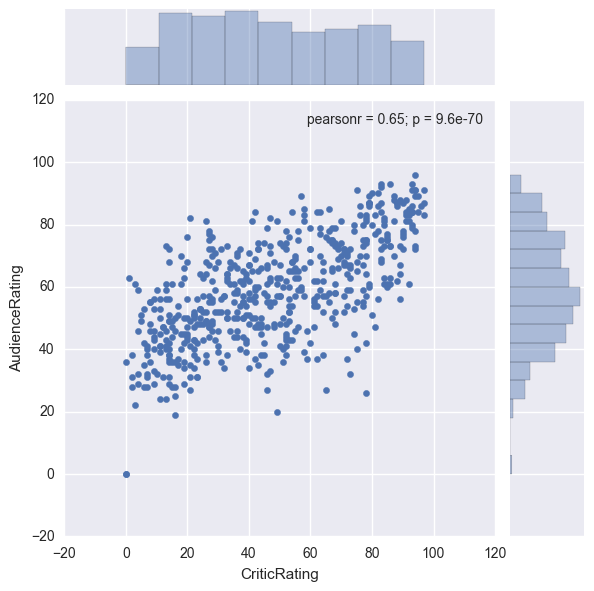

In [31]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

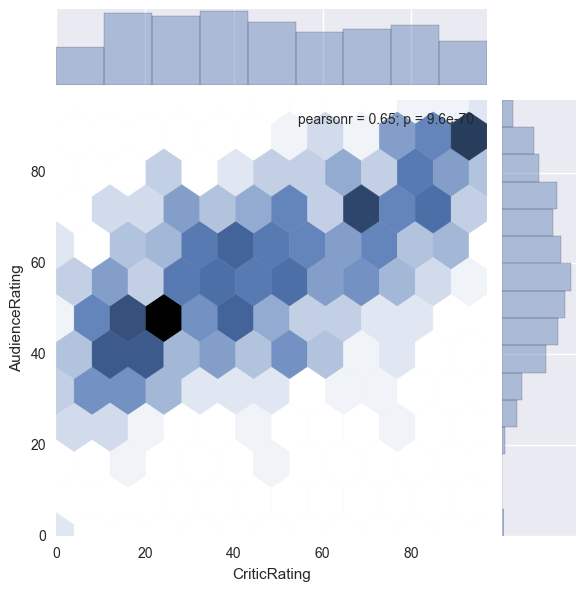

In [32]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

In [33]:
#Chart 1

In [34]:
####Histograms

TypeError: slice indices must be integers or None or have an __index__ method

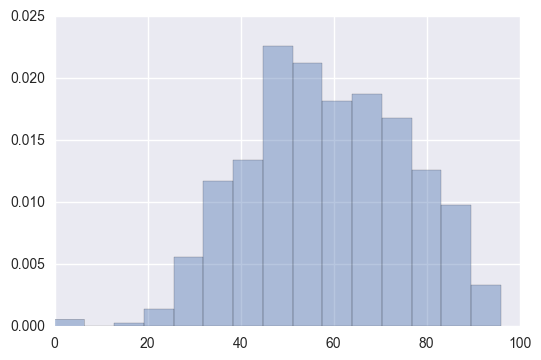

In [35]:
m1 = sns.distplot(movies.AudienceRating, bins=15)

TypeError: slice indices must be integers or None or have an __index__ method

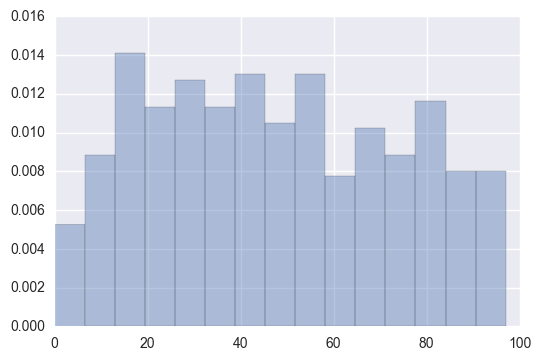

In [36]:
m2 = sns.distplot(movies.CriticRating, bins=15)

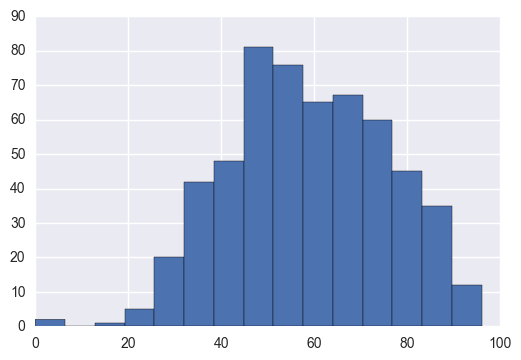

In [37]:
# Chart 2 sns.set_style("white")
n1 = plt.hist(movies.AudienceRating, bins=15)

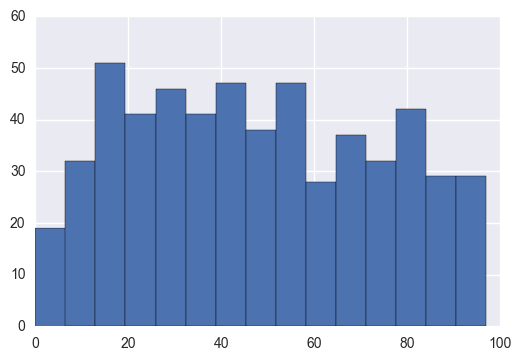

In [38]:
####Chart 3
sns.set_style("darkgrid")
n1 = plt.hist(movies.CriticRating, bins=15)

In [39]:
###Stacked Histograms (Hit tab to fill)

<function matplotlib.pyplot.show>

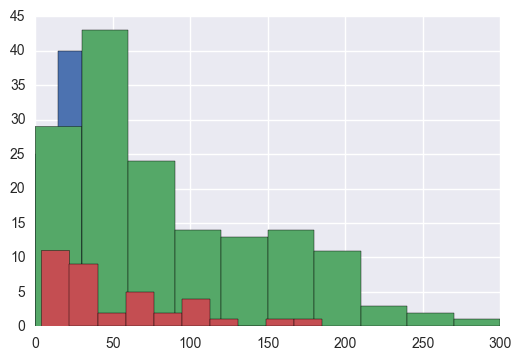

In [40]:
##Running a filter
# movies.Genre == 'Drama'
# movies[movies.Genre == 'Drama'].BudgetMillions
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions)
plt.show

<function matplotlib.pyplot.show>

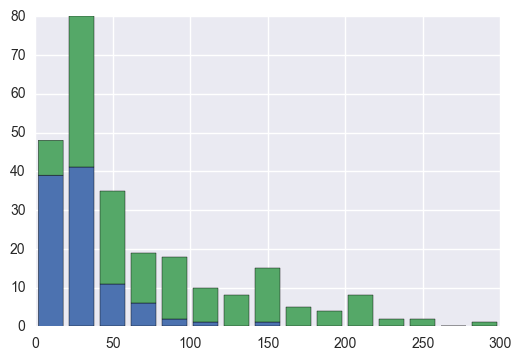

In [41]:
plt.hist([movies[movies.Genre == 'Drama'].BudgetMillions, \
          movies[movies.Genre == 'Action'].BudgetMillions], \
         bins =15, stacked=True)
plt.show


In [42]:
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


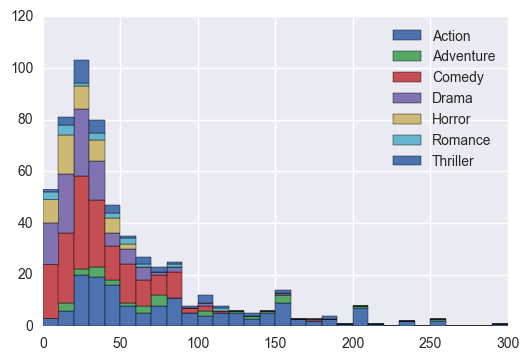

In [43]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()

In [44]:
###Kernal Density Estimate Plot

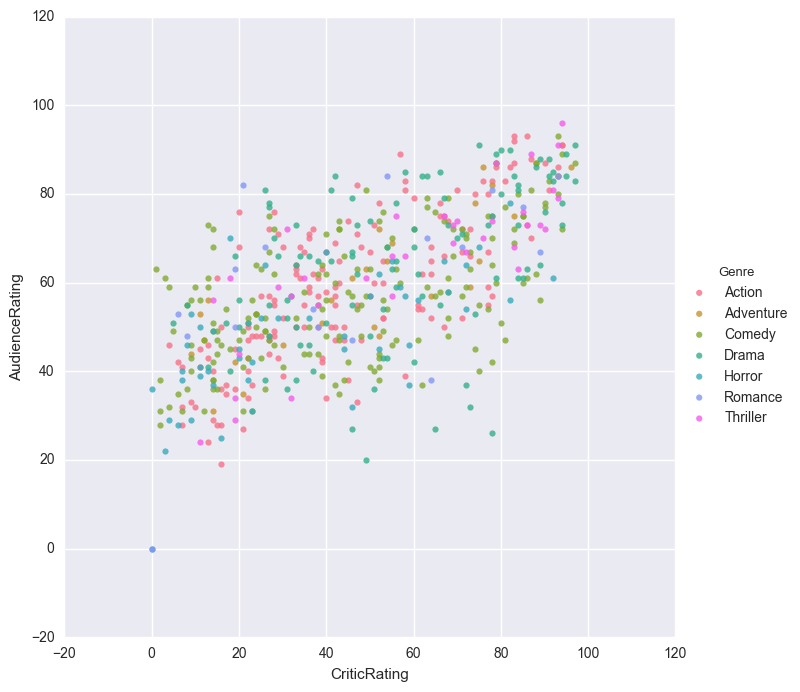

In [45]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', \
                 fit_reg=False, hue='Genre', \
                 size=7, aspect=1)

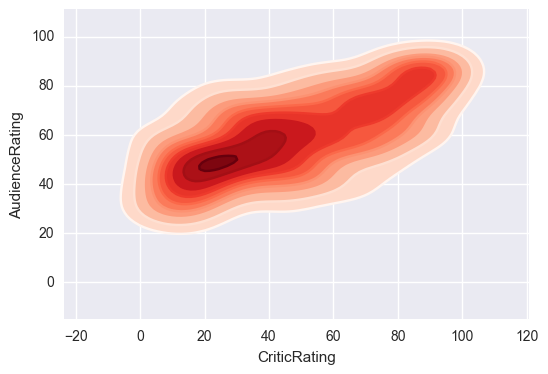

In [46]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                shade=True, shade_lowest=False, cmap='Reds')

###TIPS
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               cmap='Reds')

In [47]:
#Working with Subplots()
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

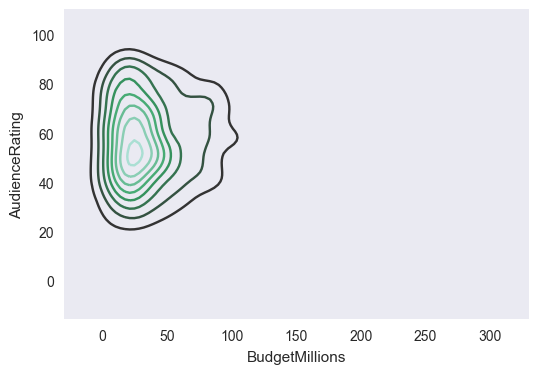

In [48]:
sns.set_style("dark")
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

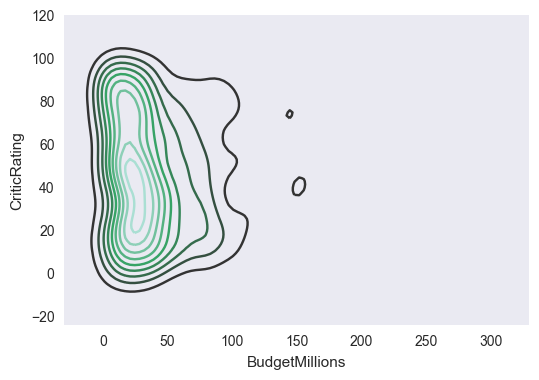

In [49]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-20, 160)]

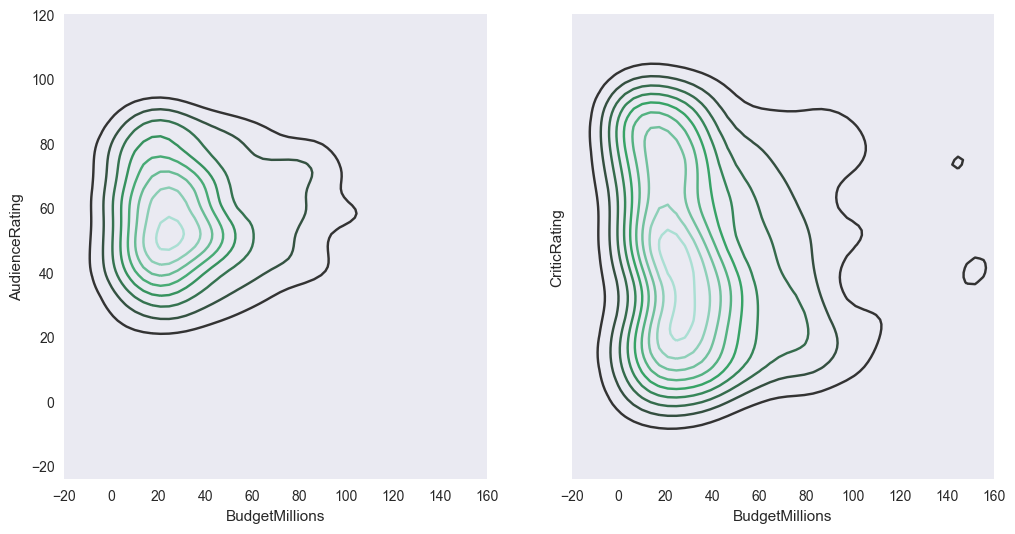

In [50]:
f, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,160))

In [51]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B4C623A90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000027B4CF17EF0>], dtype=object)

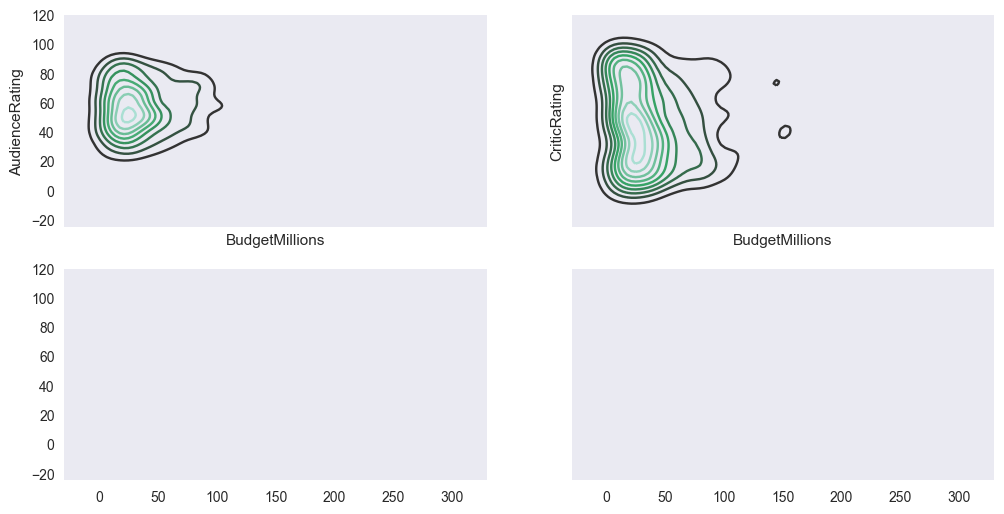

In [52]:
f, axes = plt.subplots(2, 2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])

In [53]:
##ViolinPlots

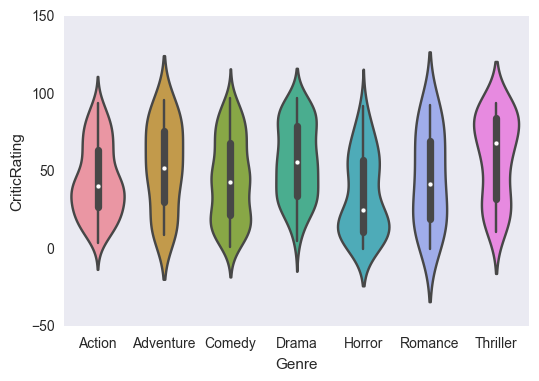

In [54]:
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')

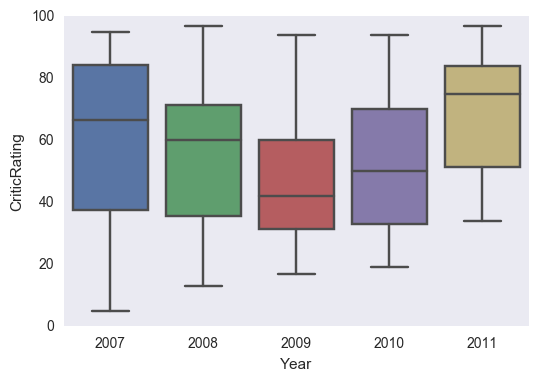

In [55]:
# w = sns.boxplot(data=movies, x='Genre', y='CriticRating')
w = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating')

In [56]:
###Creating a Facet Grid

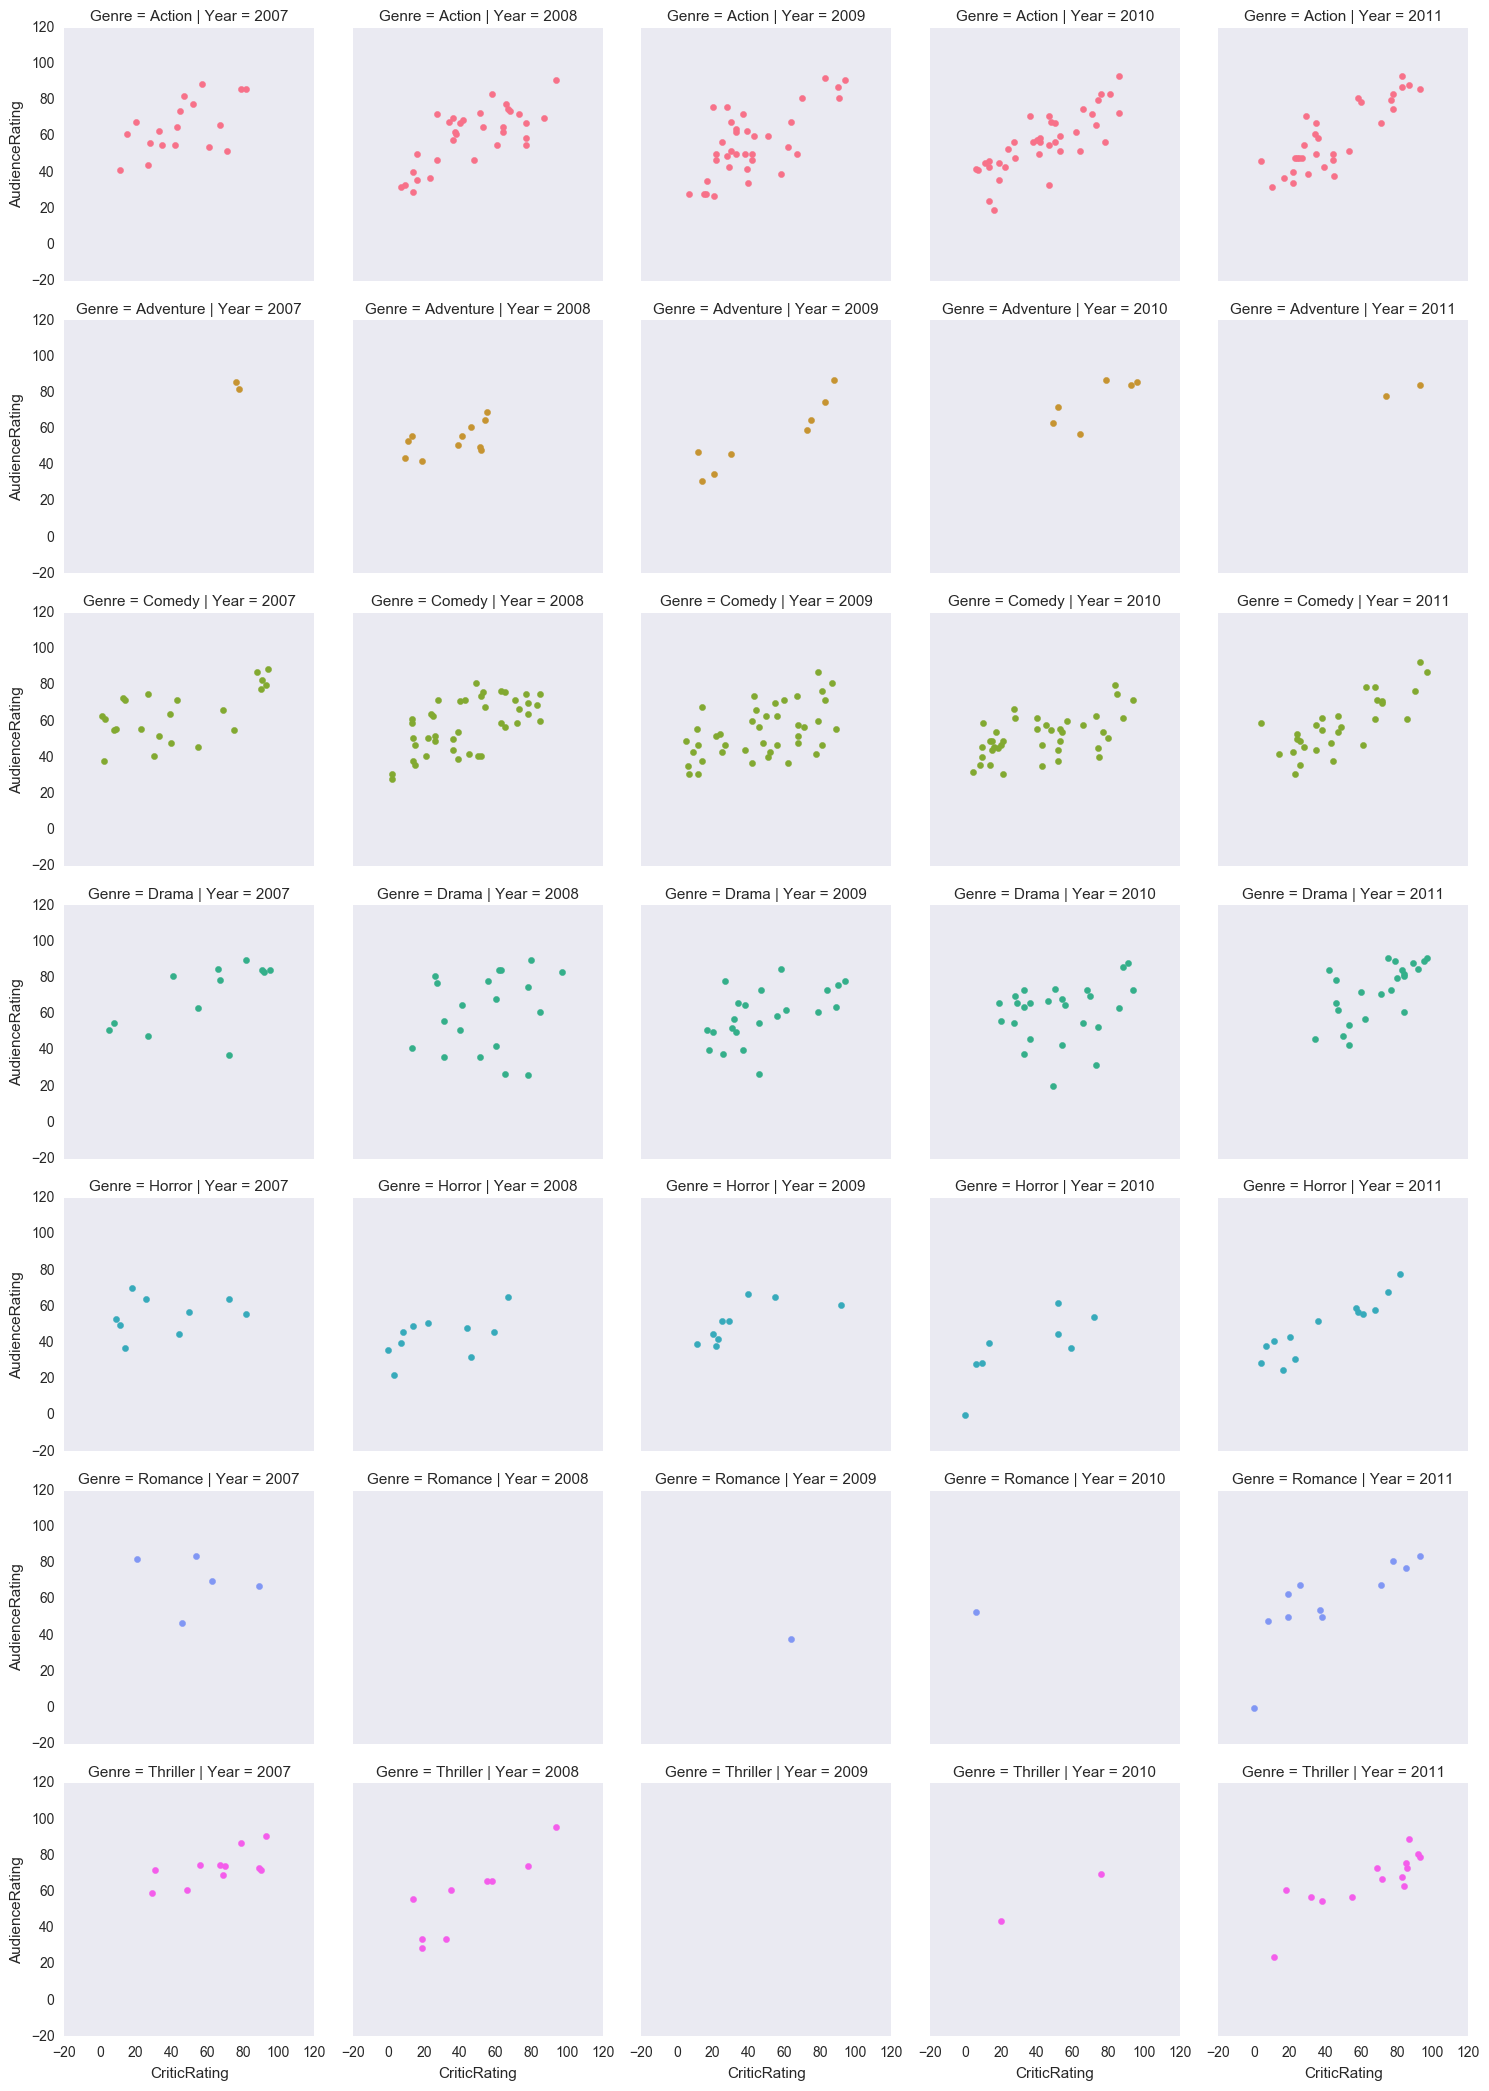

In [57]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

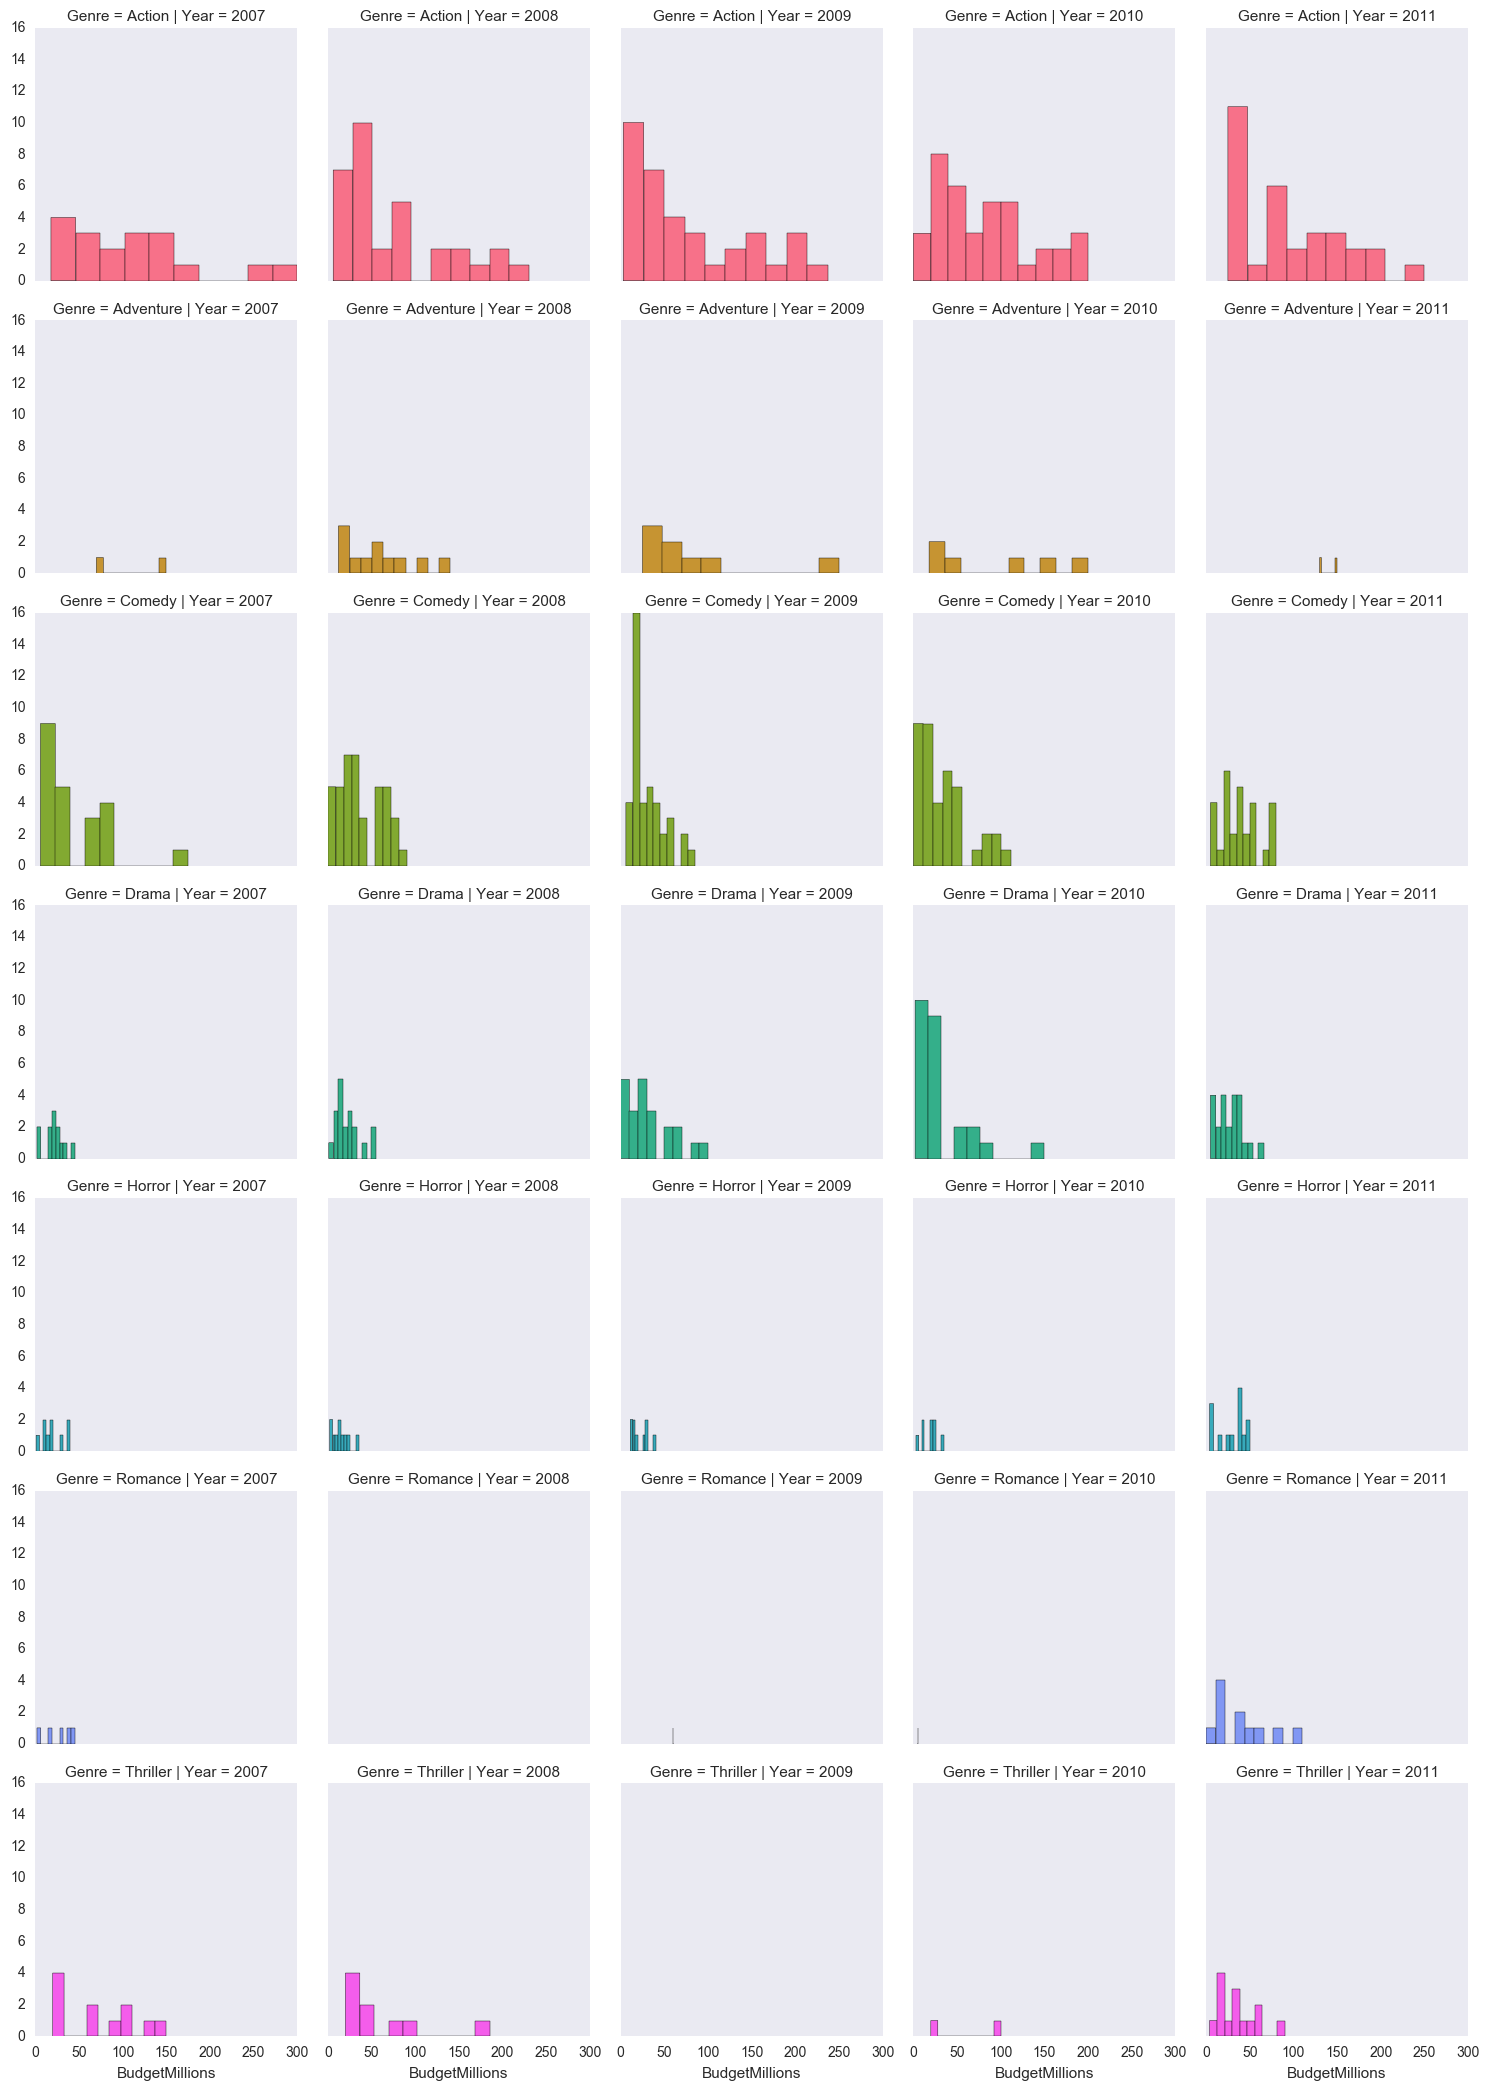

In [58]:
#can populate with any type of chart.
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

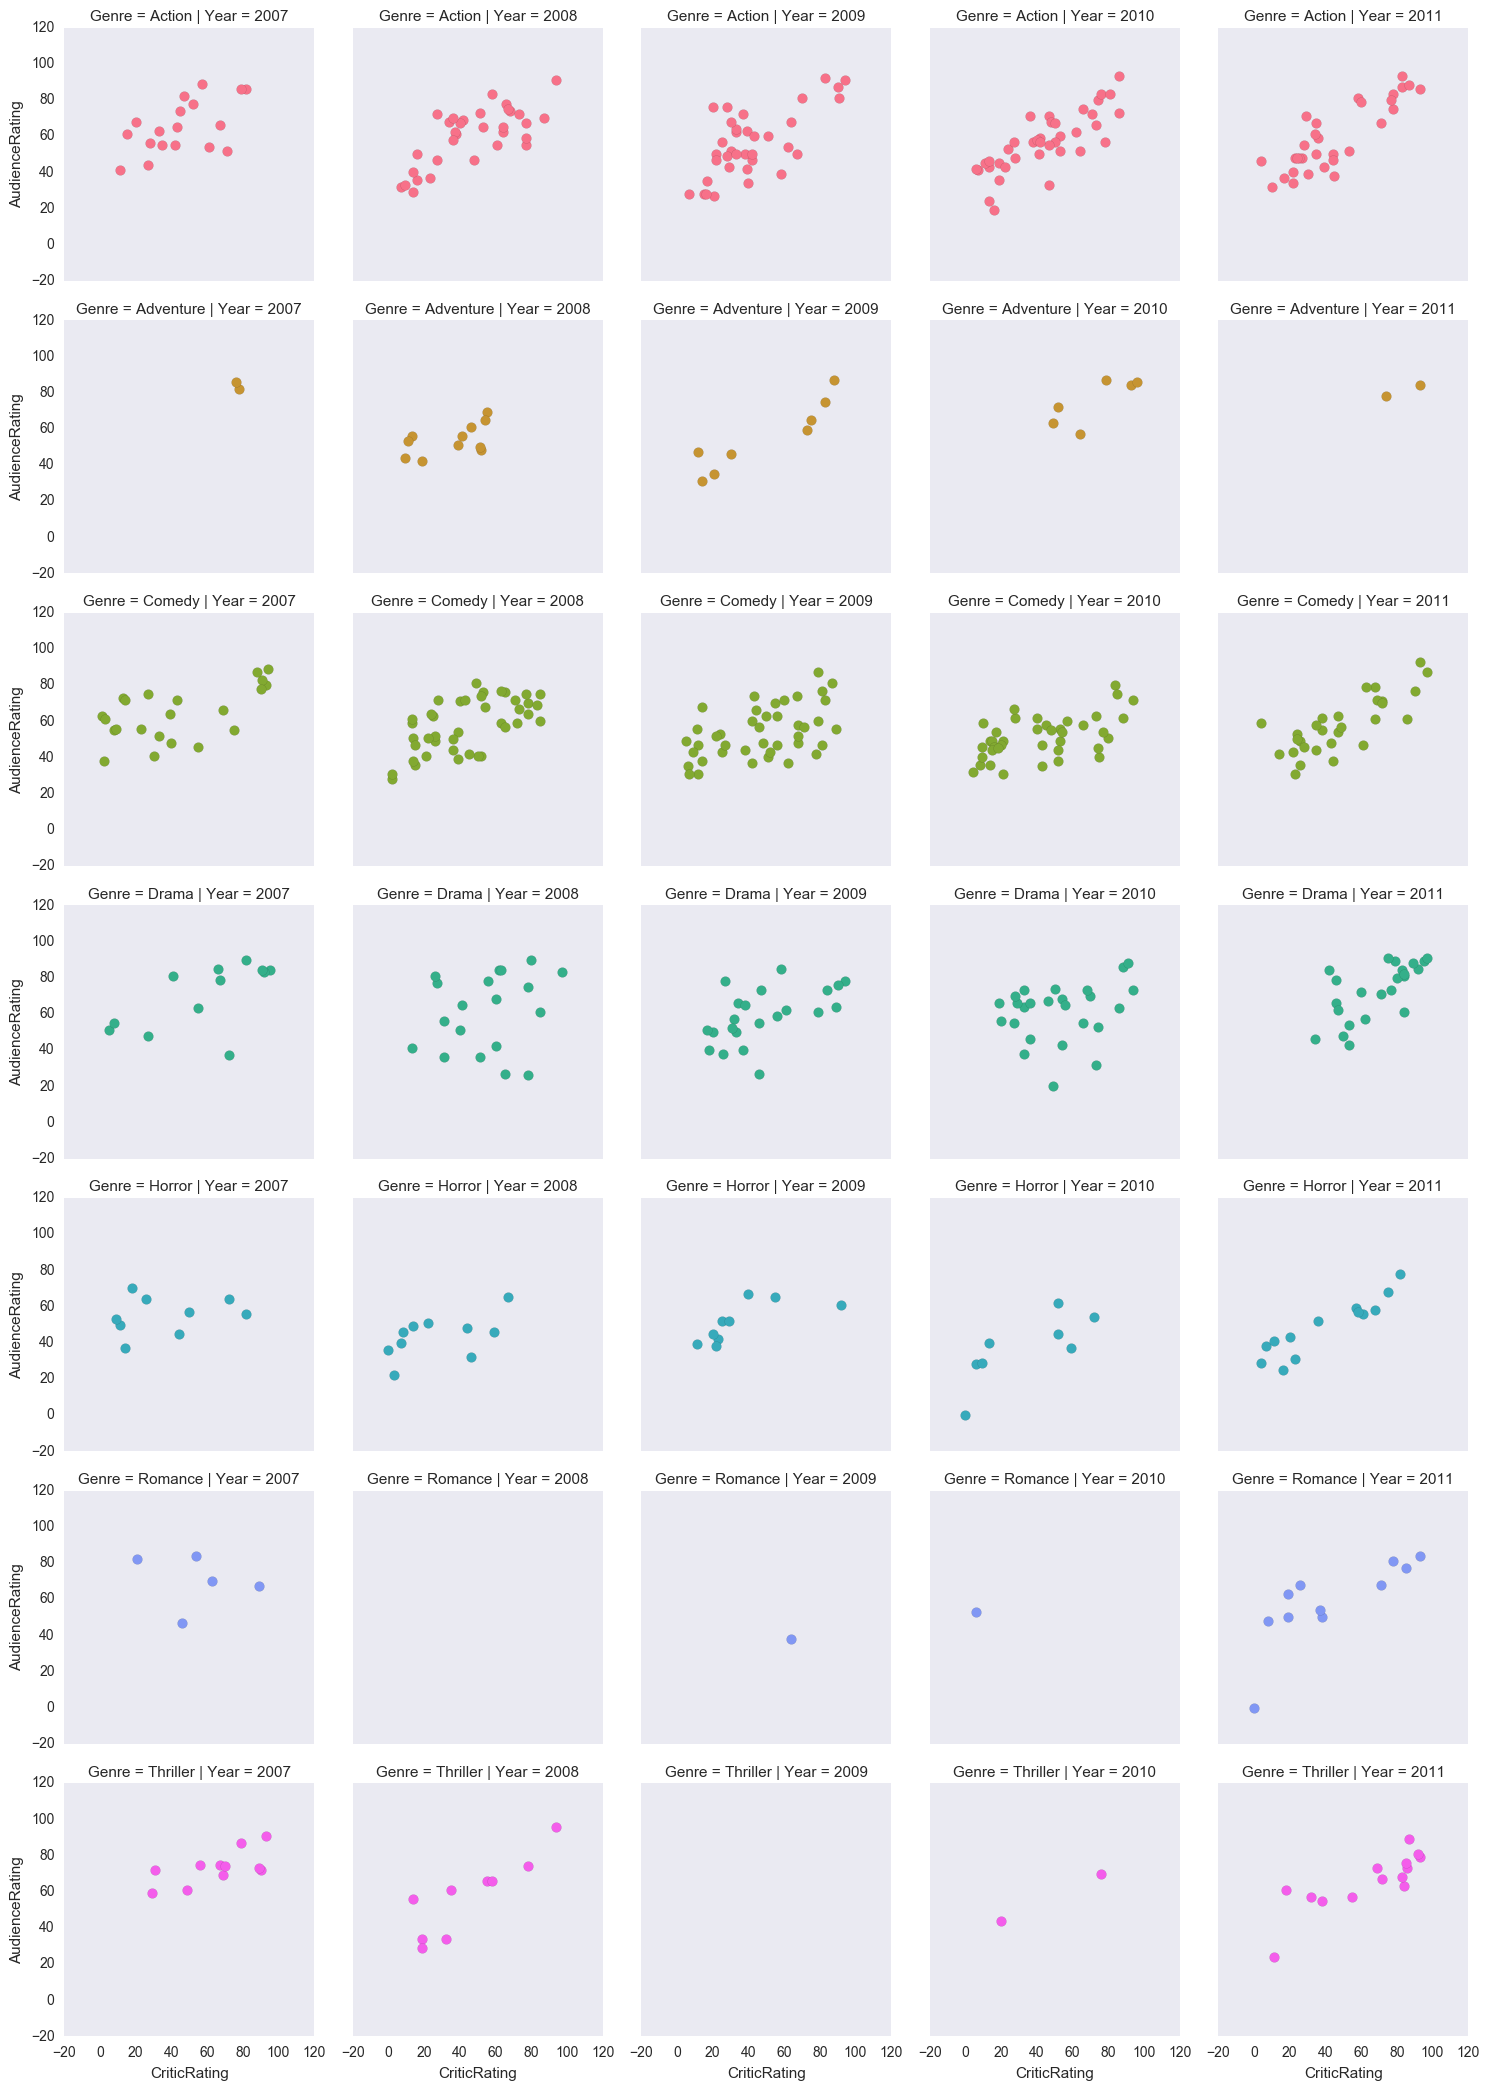

In [59]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=.05, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

In [60]:
kws

{'edgecolor': 'black', 'linewidth': 0.05, 's': 50}

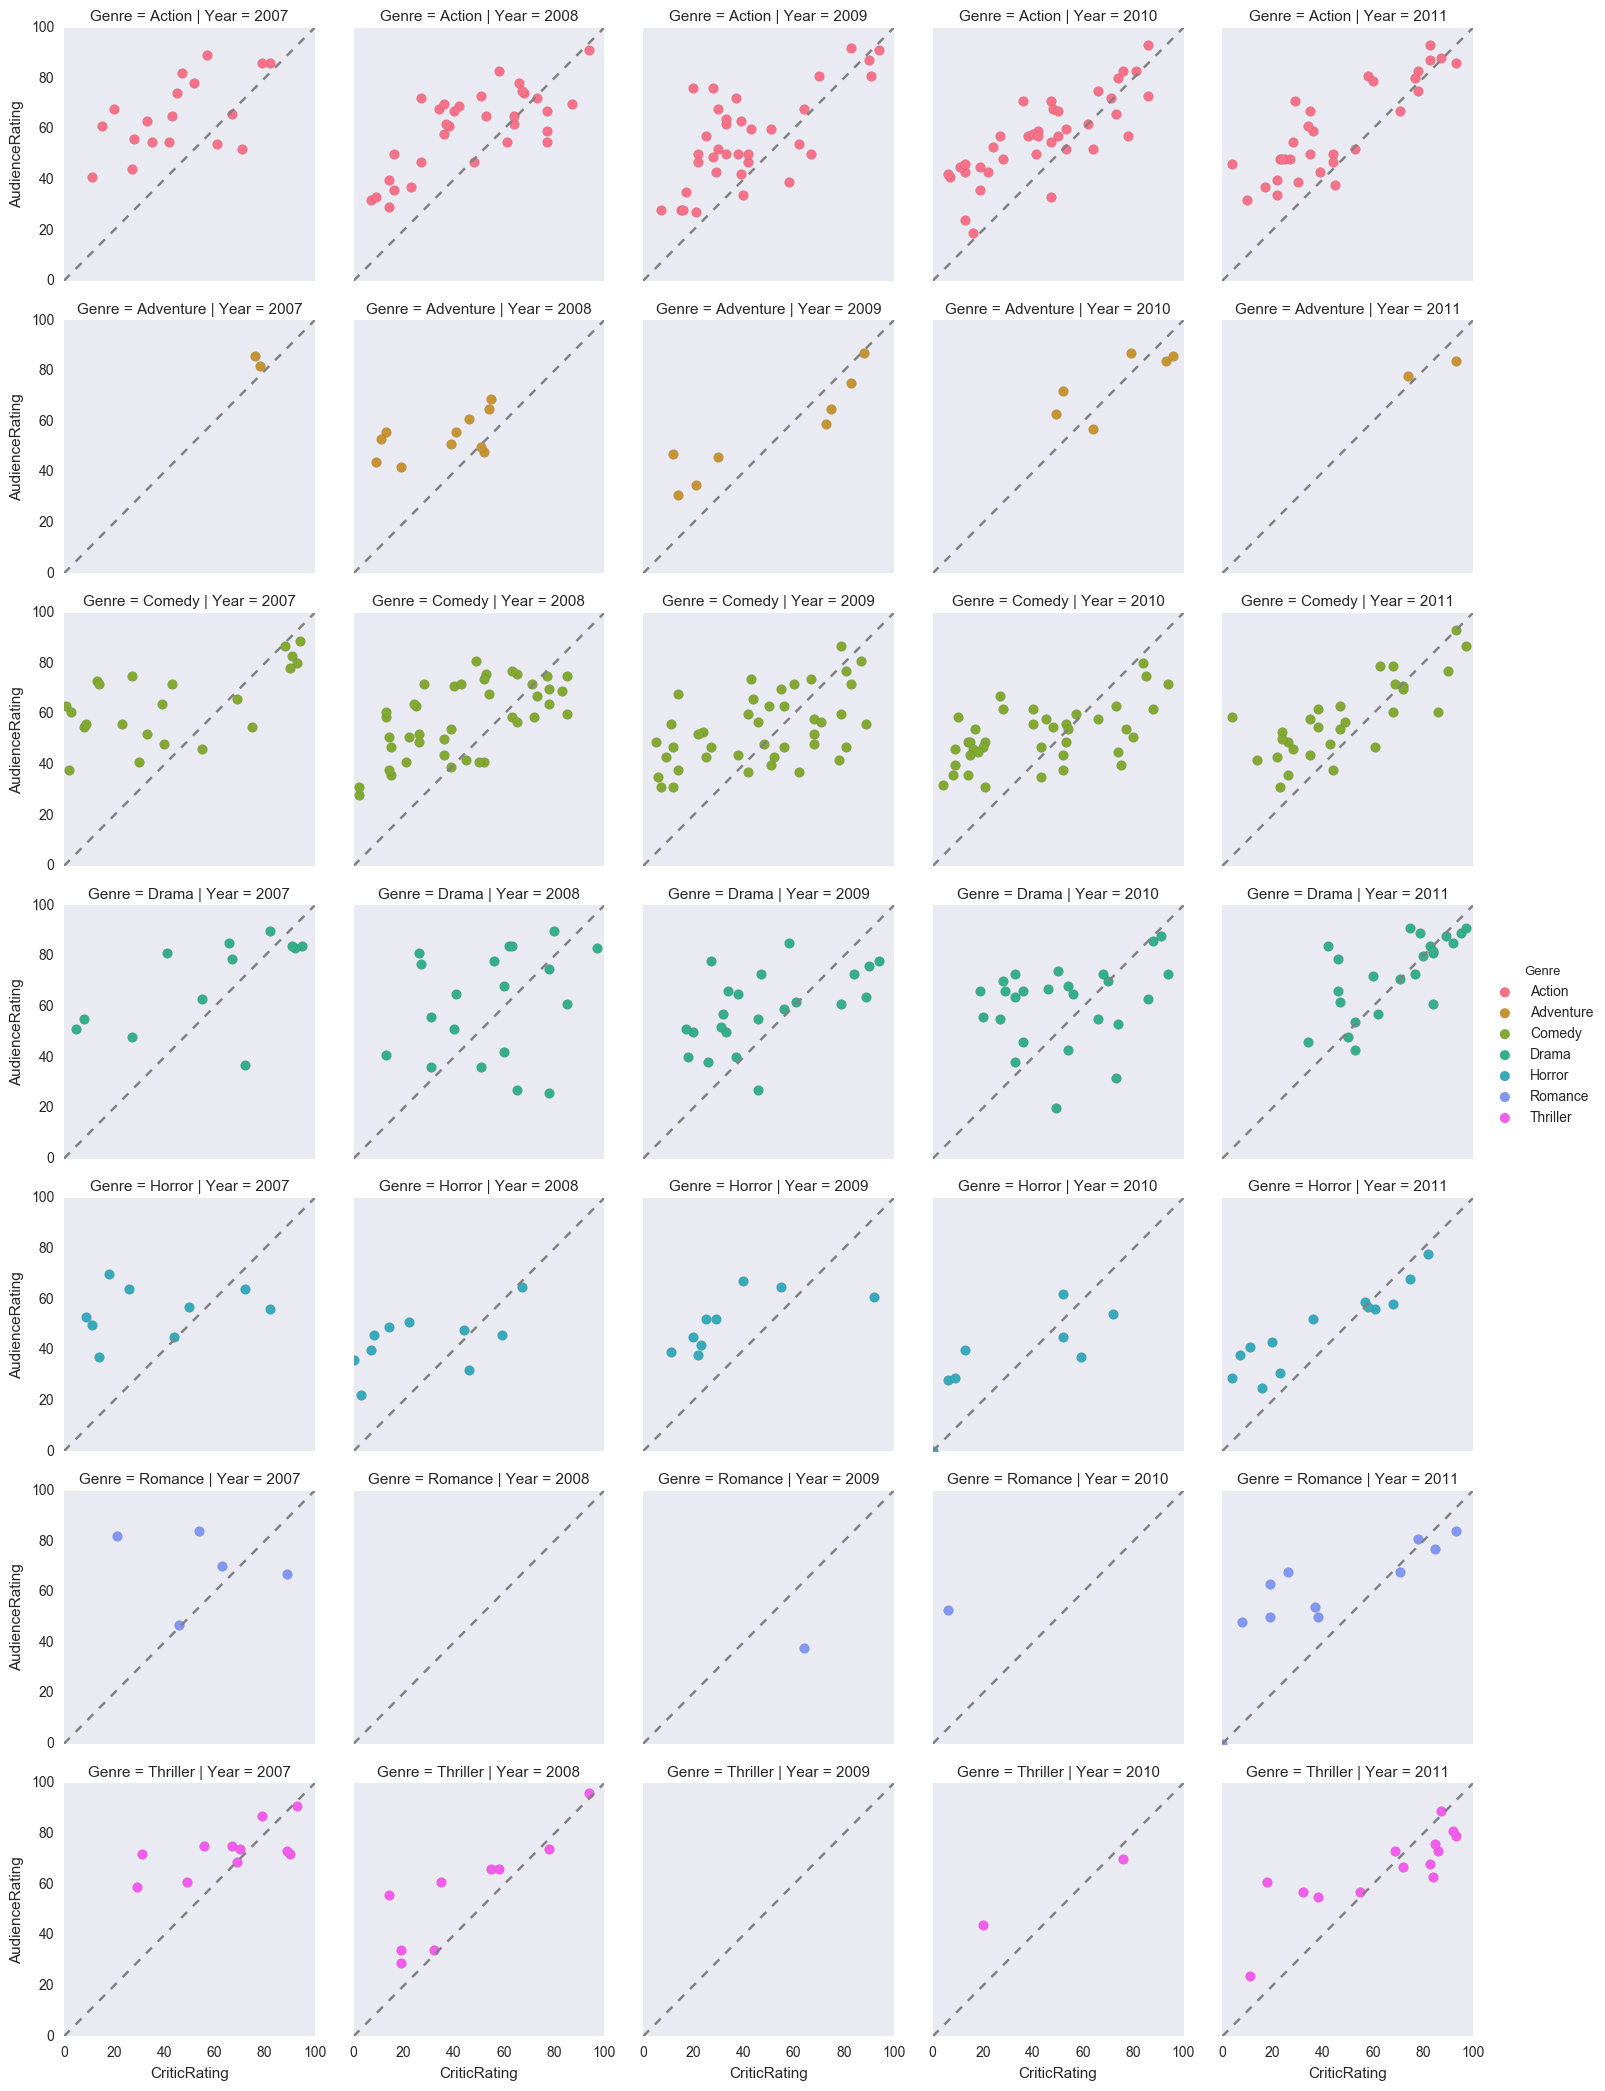

In [61]:
#Controlling Axes and Adding Diagonals
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=.05, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls="--")
g.add_legend()

In [62]:
##Build a dashboard

In [63]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<function matplotlib.pyplot.show>

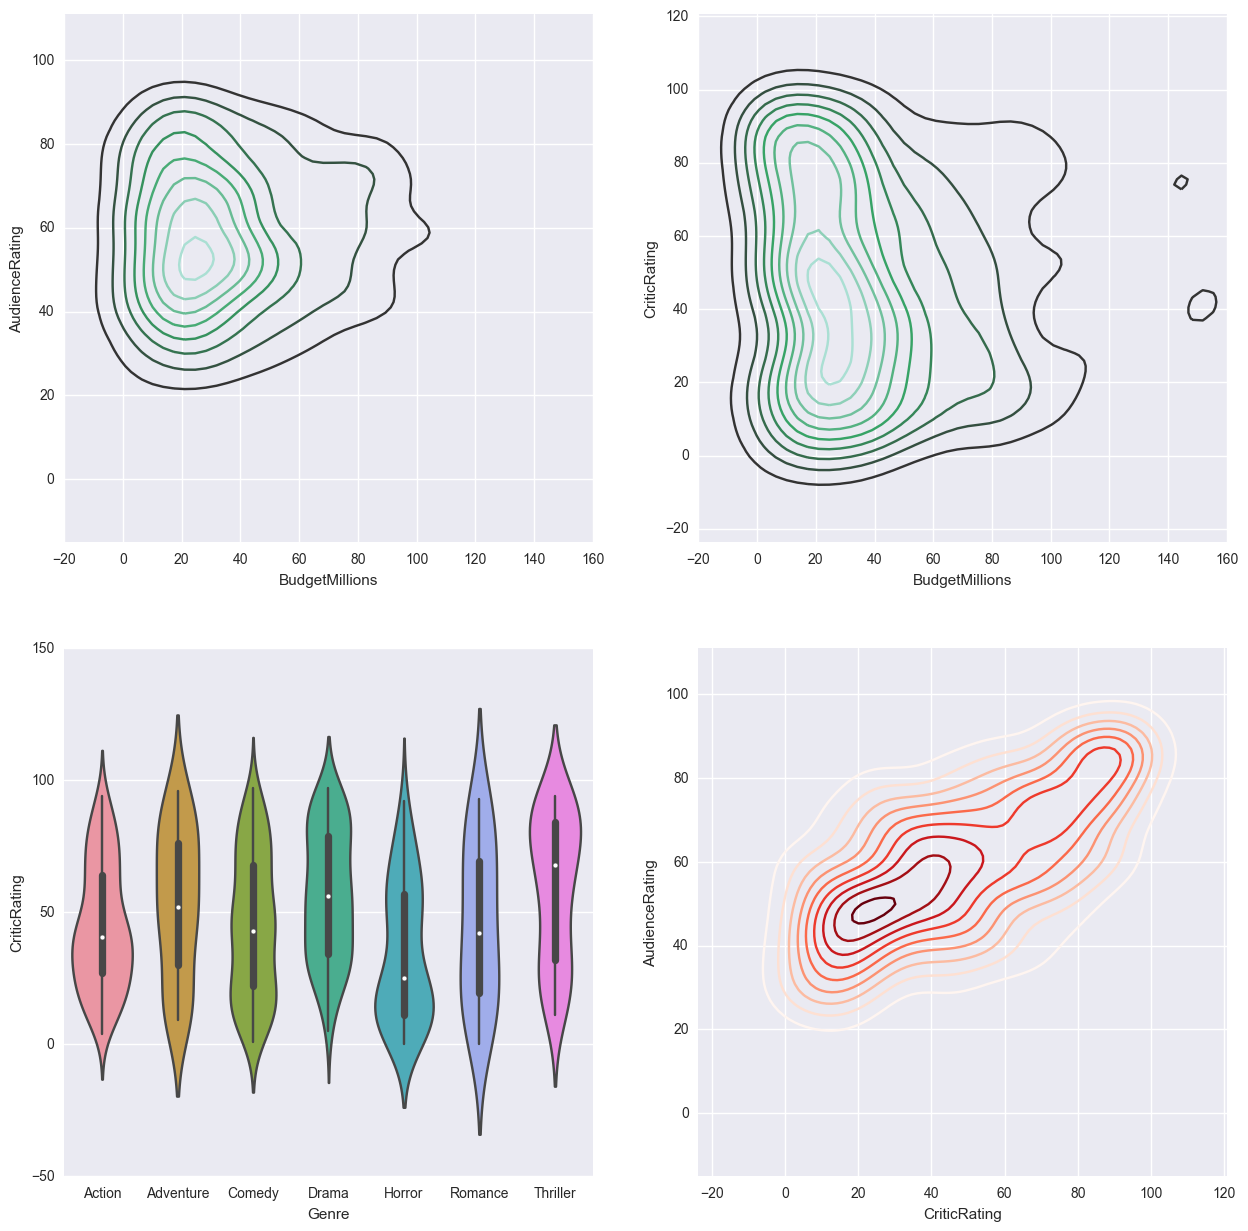

In [64]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2, 2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
z = sns.violinplot(data=movies, x='Genre', y='CriticRating', ax=axes[1,0])
# axes[1,1.hist(movies.CriticRating, bins=15)
# k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
#                shade=True, shade_lowest=False, cmap='Reds')
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               cmap='Reds', ax=axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show

In [ ]:
Styling Dashboards


In [65]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

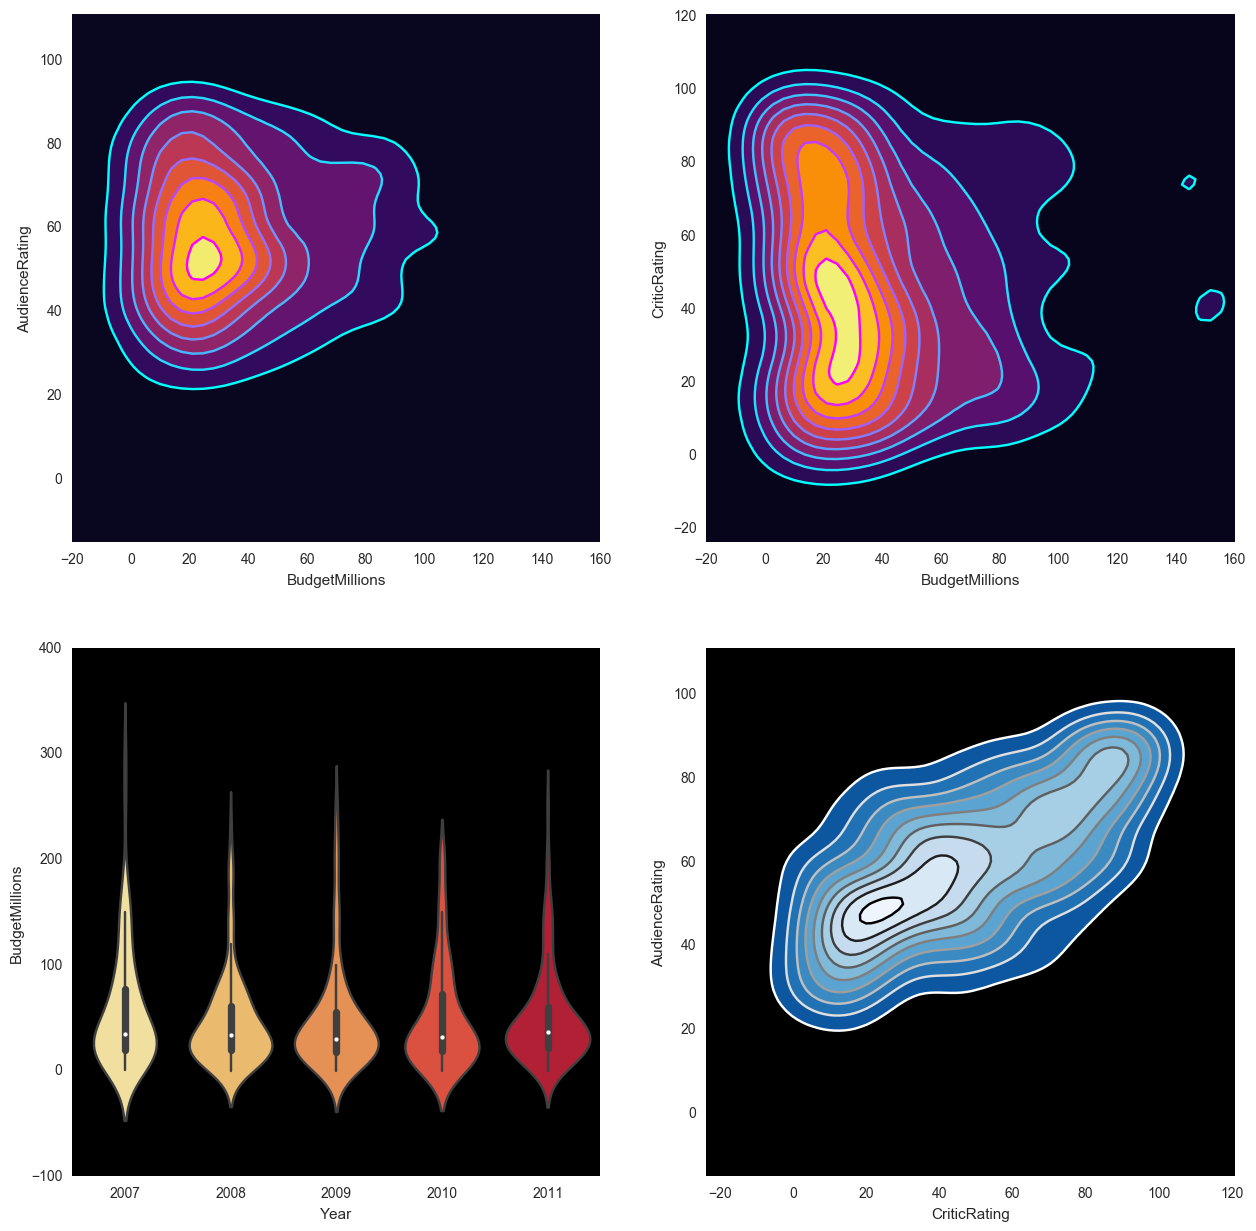

In [81]:
sns.set_style("dark", {"axes.facecolor": "black"})
f, axes = plt.subplots(2, 2, figsize=(15,15))

k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, \
                 shade_lowest=True, cmap='inferno', ax=axes[0,0])
k1.set(xlim=(-20,160))
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                  cmap='cool', ax=axes[0,0])


k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating,\
                 shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,1])
k2.set(xlim=(-20,160))
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating,\
                 cmap='cool', ax=axes[0,1])


z = sns.violinplot(data=movies,\
                  x='Year', y='BudgetMillions', ax=axes[1,0],\
                  palette='YlOrRd')


k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               shade=True, shade_lowest=False, cmap='Blues_r',\
                ax=axes[1,1])

k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
               cmap='gist_gray_r', ax=axes[1,1])

# axes[1,1.hist(movies.CriticRating, bins=15)
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

In [82]:
###Chart Improvement

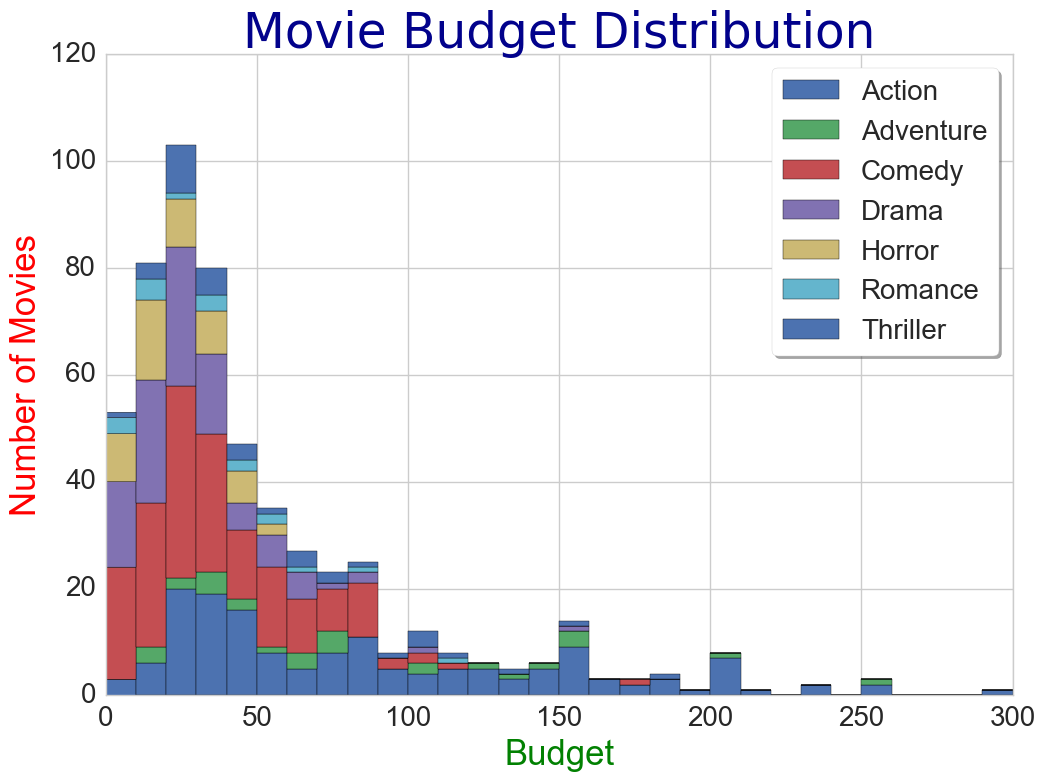

In [95]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
sns.set_style("whitegrid")
##Chart is created inside subplot
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) ##Size of paper
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.title("Movie Budget Distribution", fontsize=35, \
          color="DarkBlue", fontname="Console")
plt.ylabel("Number of Movies", fontsize=25, color="Red")
plt.xlabel("Budget", fontsize=25, color="Green")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(frameon=True, fancybox=True, shadow=True, \
           framealpha=1, prop={'size':20})
plt.show()

In [ ]:
plt.legend